In [8]:
#import all the neccesary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#import the csv file
dataset= pd.read_csv('C:\\Users\\YUSUF YETUNDE\\Documents\\Anaconda\\master.csv')
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [10]:
#checking the dataset information to know
# if there are null values, datatype for each column and the number of columns and rows of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [11]:
#counting how many times each entity occurs in country's  column cos it has the highest entities compared to others
dataset['country'].value_counts()

Austria                   382
Iceland                   382
Netherlands               382
Mauritius                 382
Puerto Rico               372
United Kingdom            372
Israel                    372
Republic of Korea         372
Japan                     372
Ecuador                   372
Singapore                 372
Mexico                    372
Greece                    372
Brazil                    372
United States             372
Luxembourg                372
Belgium                   372
Italy                     372
Argentina                 372
Chile                     372
Spain                     372
Colombia                  372
Malta                     372
Bulgaria                  360
Australia                 360
Norway                    360
Costa Rica                360
Ireland                   360
France                    360
Guatemala                 360
                         ... 
Bahrain                   252
Estonia                   252
Latvia    

In [12]:
#checking if the dataset contains null values
dataset.isnull().head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False


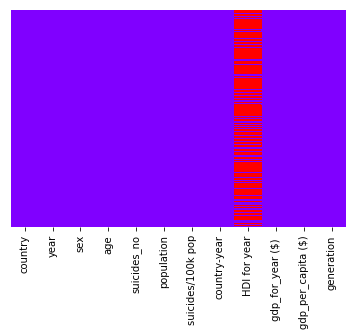

In [13]:
#visualizing it for proper identification
sns.heatmap(dataset.isnull(),cbar=False,cmap='rainbow',yticklabels=False)
#only one column has null values,and the null values are much so it has to be dropped

In [14]:
#dropping the null values column
dataset.dropna(axis=1,inplace=True)
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [15]:
#dropping the country-year,it is not important cos there are existing columns for country and year
dataset.drop(['country-year'],axis=1,inplace=True)
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [16]:
#checking the dataset correlation i.e how each column depend on one another
dataset.corr()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.001785
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,1.000000


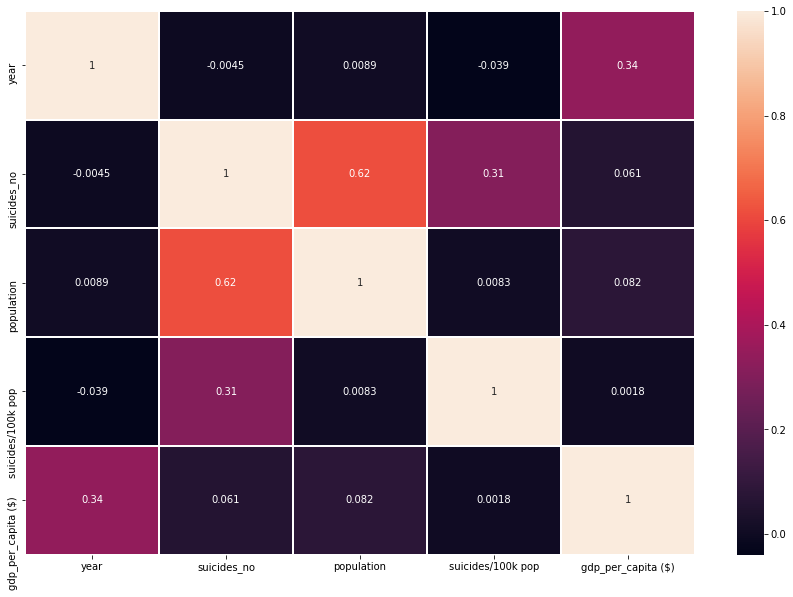

In [17]:
#visualizing the correlation using the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True,linecolor='white',linewidth=1)

In [18]:
#creating pivot table which shows country against year and values are suicides no,in each country with the corespondng year
dataset.pivot_table(index='country',columns='year',values='suicides_no')

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,6.083333,5.250000,5.666667,NaN,NaN,3.916667,6.083333,4.166667,...,10.333333,13.333333,0.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.083333,0.000000,...,0.083333,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.083333,NaN
Argentina,165.666667,190.333333,190.500000,196.166667,187.250000,178.333333,162.583333,182.000000,185.833333,186.750000,...,245.500000,254.916667,240.333333,245.250000,242.666667,270.666667,248.916667,269.250000,256.083333,NaN
Armenia,NaN,NaN,NaN,NaN,NaN,7.750000,6.666667,6.916667,8.833333,9.333333,...,5.916667,5.250000,4.416667,6.083333,5.583333,6.583333,5.583333,4.833333,6.166667,6.7
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.666667,0.333333,0.333333,0.583333,0.750000,NaN,NaN,NaN,NaN,NaN
Australia,155.083333,170.333333,180.333333,181.000000,172.166667,183.500000,190.666667,187.583333,169.833333,190.250000,...,185.750000,195.083333,194.750000,201.666667,199.333333,215.000000,217.333333,240.916667,252.250000,NaN
Austria,174.250000,178.250000,172.416667,154.250000,158.166667,152.083333,147.416667,146.583333,142.000000,148.000000,...,107.083333,105.583333,106.500000,105.333333,107.333333,106.333333,107.583333,109.500000,104.250000,120.1
Azerbaijan,NaN,NaN,NaN,NaN,NaN,9.500000,11.166667,12.000000,9.916667,3.916667,...,4.583333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bahamas,0.083333,NaN,0.250000,NaN,NaN,NaN,NaN,NaN,0.583333,0.250000,...,0.416667,0.333333,0.500000,0.833333,0.333333,0.416667,0.416667,NaN,NaN,NaN


In [19]:
#visualizing the dataset

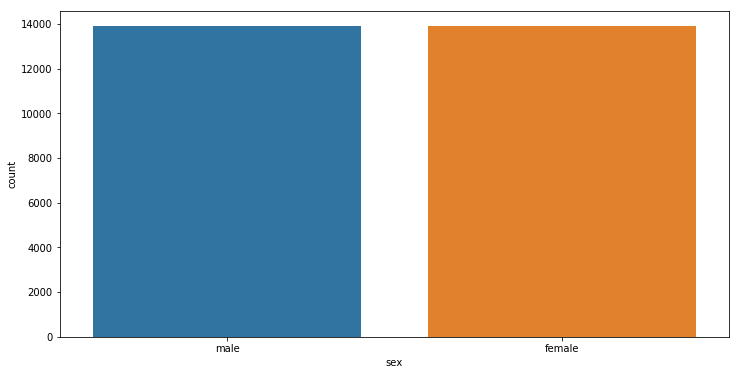

In [20]:
#countplot shows how many times both gender occur in every entities i.e amount of times each gender appears in the dataset
plt.figure(figsize=(12,6))
sns.countplot(x='sex',data=dataset)

C:\Users\YUSUF YETUNDE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


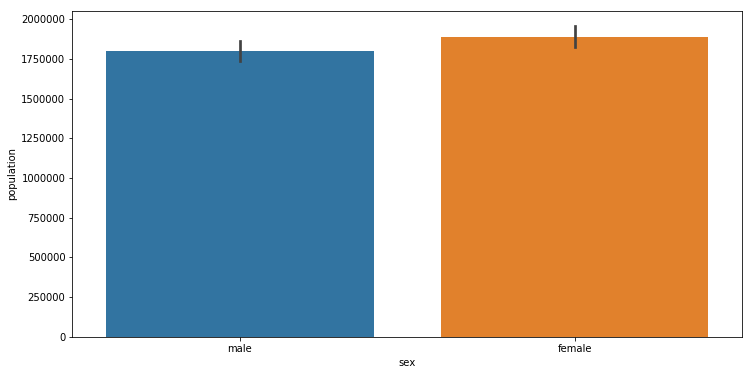

In [21]:
#shows the highest population based on gender
plt.figure(figsize=(12,6))
sns.barplot(x='sex',y='population',data=dataset)

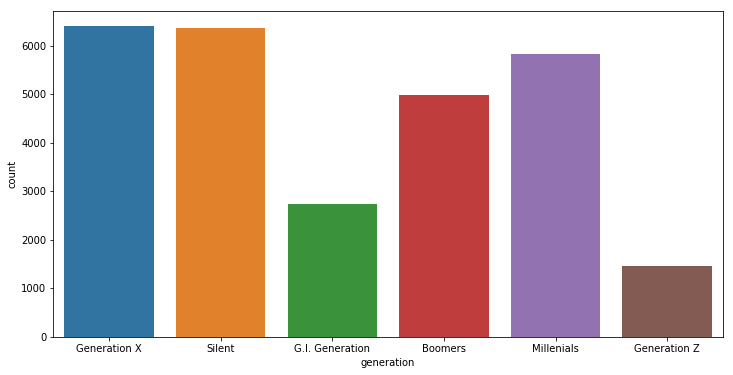

In [22]:
#countplot shows how times all the generations occur in every entities i.e amount of times each generation appears in the dataset
plt.figure(figsize=(12,6))
sns.countplot(x='generation',data=dataset)

C:\Users\YUSUF YETUNDE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


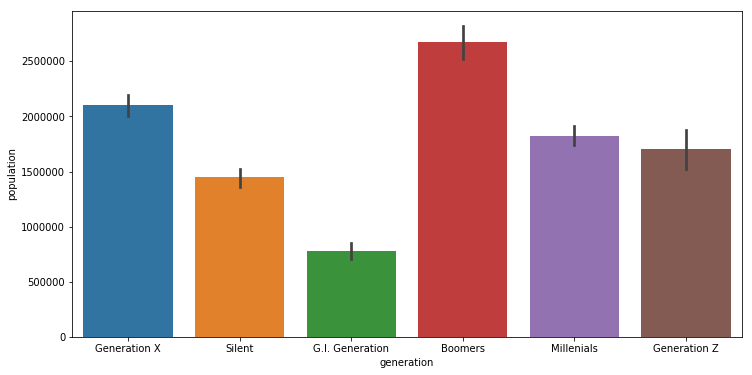

In [23]:
#shows the highest generation based on population
plt.figure(figsize=(12,6))
sns.barplot(x='generation',y='population',data=dataset)

C:\Users\YUSUF YETUNDE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


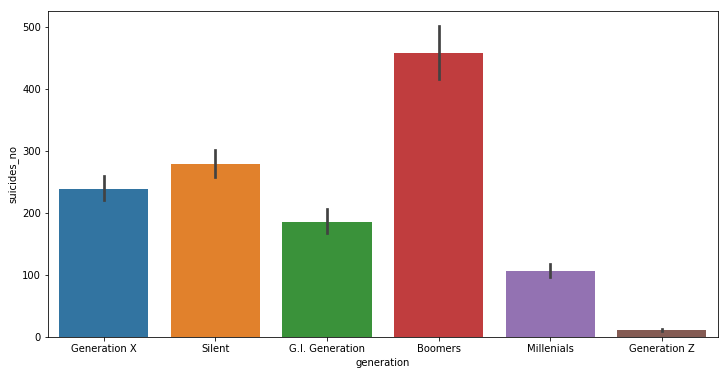

In [24]:
#shows the suicides rate in each generation
plt.figure(figsize=(12,6))
sns.barplot(x='generation',y='suicides_no',data=dataset)

C:\Users\YUSUF YETUNDE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


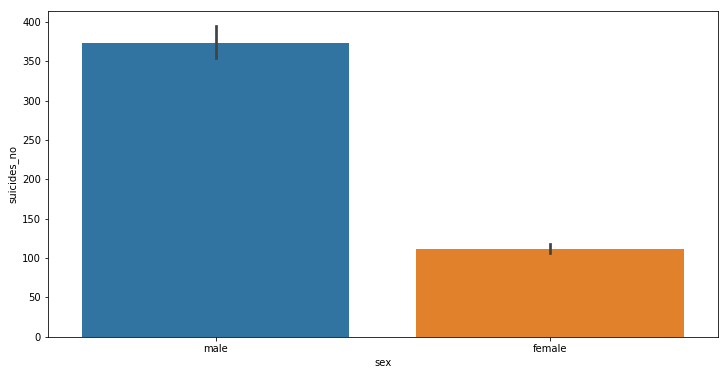

In [25]:
#shows the suicides rate in both gender
plt.figure(figsize=(12,6))
sns.barplot(x='sex',y='suicides_no',data=dataset)

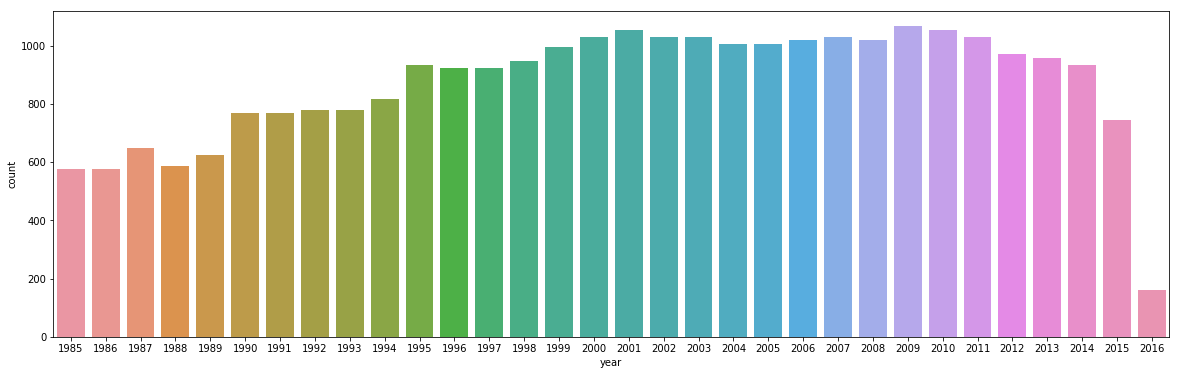

In [26]:
#countplot shows how many times each year occurs in every entities i.e amount of times each year appears in the dataset
plt.figure(figsize=(20,6))
sns.countplot(x='year',data=dataset)

C:\Users\YUSUF YETUNDE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


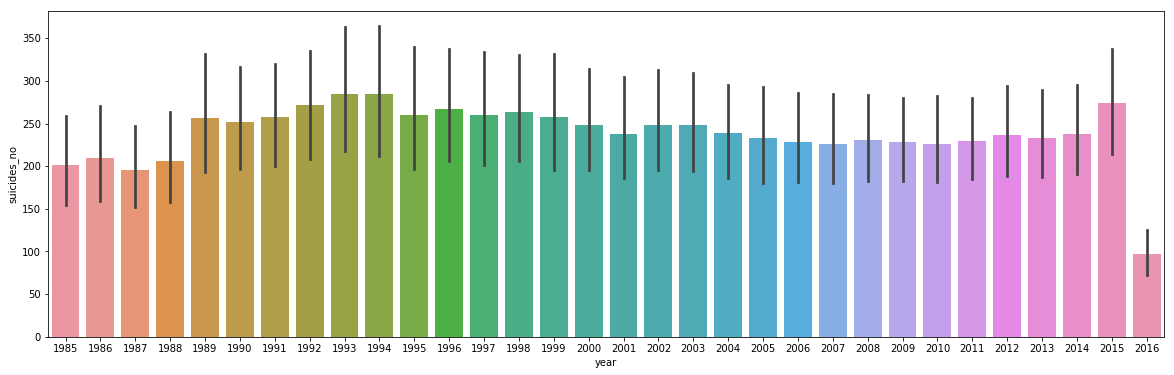

In [27]:
#shows the suicides rate for every year
plt.figure(figsize=(20,6))
sns.barplot(x='year',y='suicides_no',data=dataset)

C:\Users\YUSUF YETUNDE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


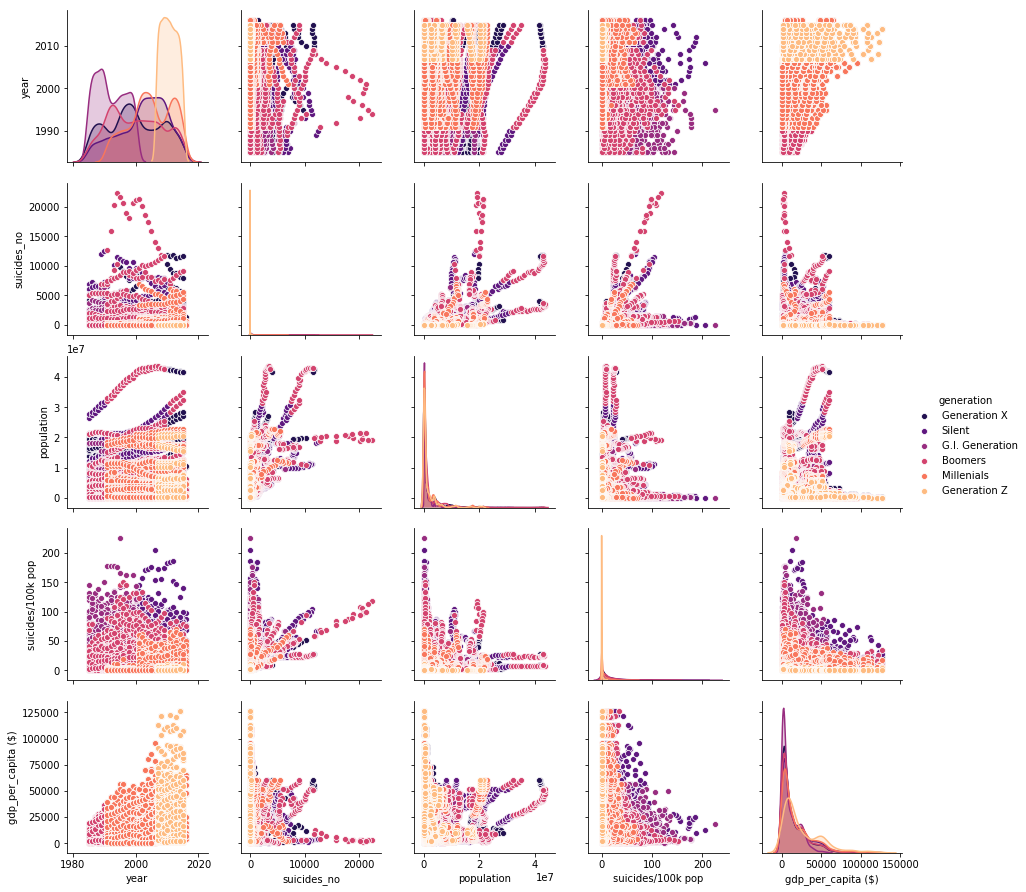

In [28]:
#it plots every columns against one another for all the generatiobs
sns.pairplot(dataset,hue='generation',palette='magma')

C:\Users\YUSUF YETUNDE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


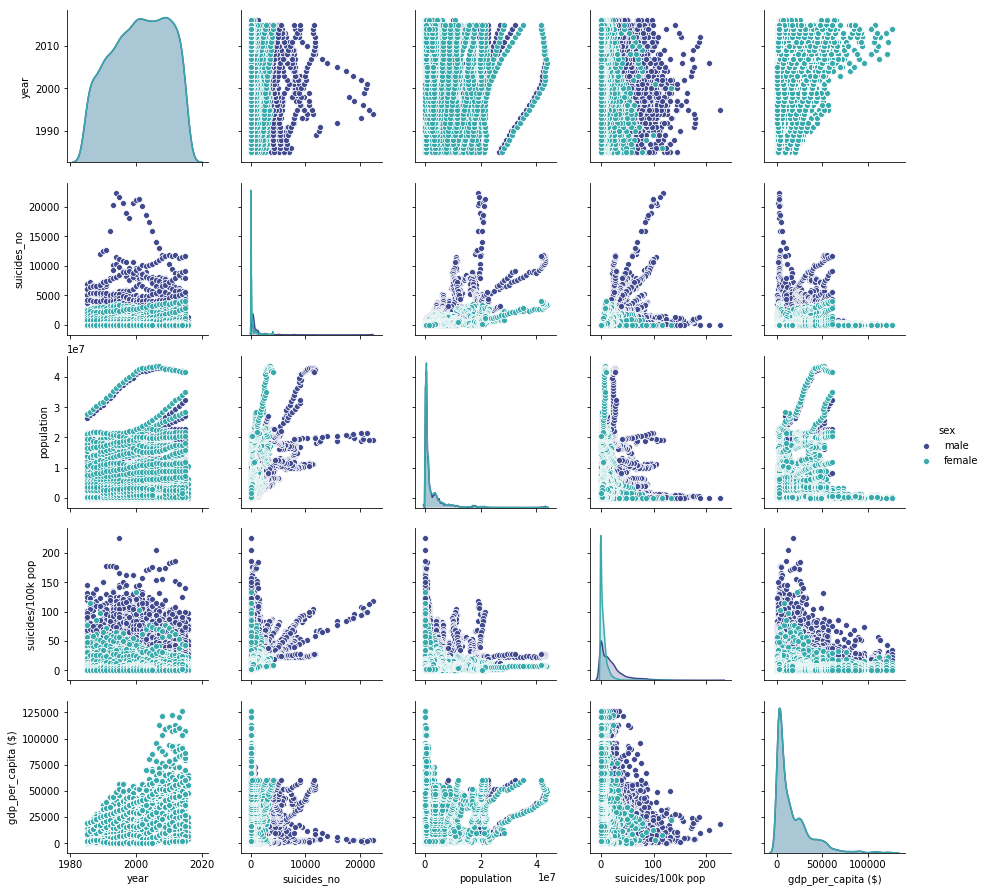

In [29]:
#it plots every columns against one another for both genders
sns.pairplot(dataset,hue='sex',palette='mako')

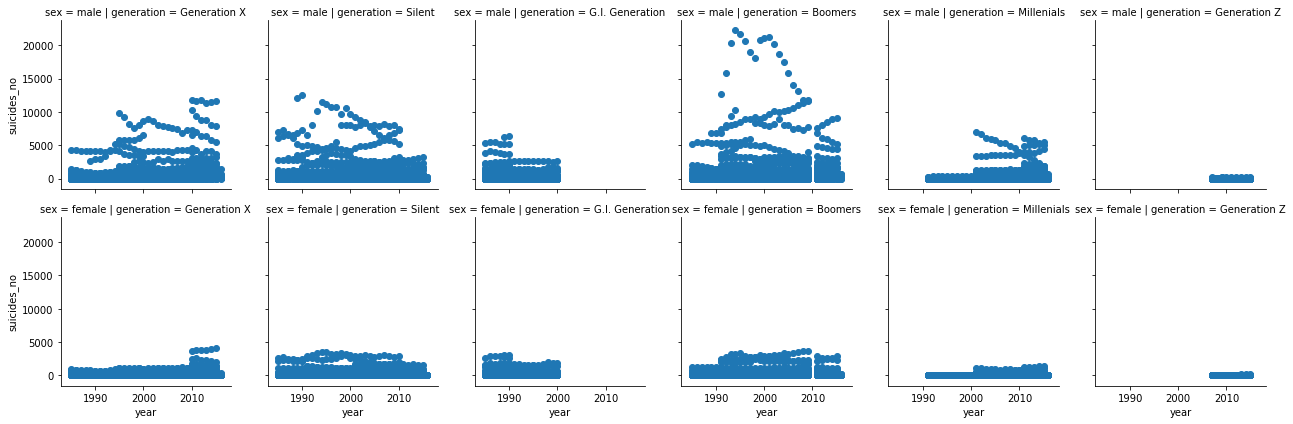

In [30]:
#it plots suicides no against year for each generation in the columns and sex in rows
g=sns.FacetGrid(data=dataset,row='sex',col='generation')
g.map(plt.scatter,'year','suicides_no',)

In [31]:
#coding aspect
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [33]:
#changing all the object type to dummies variables i.e sex,age,generation except country and gdp for year
#country column entities are much so it needs to be dropped
#there is something wrong with gdp for year column so it cant be dropped nor changed to dummies
#we create another dataframe excluding the column


In [34]:
dataframe=pd.DataFrame(dataset,(range(1,27820)),['country','year','sex','age','suicides_no','population','suicides/100k pop','gdp_per_capita ($)','generation'])
dataframe.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($),generation
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,796,G.I. Generation


In [35]:
#dummies values for sex
sex=pd.get_dummies(dataframe['sex'],drop_first=True)
sex.head()

,male
1,1
2,0
3,1
4,1
5,0


In [36]:
#dummies values for age
age=pd.get_dummies(dataframe['age'],drop_first=True)
age.head()

,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
1,0,1,0,0,0
2,0,0,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0
5,0,0,0,0,1


In [37]:
#dummies values for generation
generation=pd.get_dummies(dataframe['generation'],drop_first=True)
generation.head()

,G.I. Generation,Generation X,Generation Z,Millenials,Silent
1,0,0,0,0,1
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,0,0,0
5,1,0,0,0,0


In [38]:
#dropping country,sex,age and generation cos we have gotten dummies for them except country which got dropped 
#bcos it is much to perform dummies transformation 
dataframe.drop(['country','sex','age','generation'],axis=1,inplace=True)
dataframe.head()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
1,1987,16,308000,5.19,796
2,1987,14,289700,4.83,796
3,1987,1,21800,4.59,796
4,1987,9,274300,3.28,796
5,1987,1,35600,2.81,796


In [39]:
#emerging both the dummies and the dataframe
data=pd.concat([dataframe,sex,age,generation],axis=1)
data

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($),male,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,G.I. Generation,Generation X,Generation Z,Millenials,Silent
1,1987,16,308000,5.19,796,1,0,1,0,0,0,0,0,0,0,1
2,1987,14,289700,4.83,796,0,0,0,0,0,0,0,1,0,0,0
3,1987,1,21800,4.59,796,1,0,0,0,0,1,1,0,0,0,0
4,1987,9,274300,3.28,796,1,1,0,0,0,0,0,0,0,0,0
5,1987,1,35600,2.81,796,0,0,0,0,0,1,1,0,0,0,0
6,1987,6,278800,2.15,796,0,0,1,0,0,0,0,0,0,0,1
7,1987,4,257200,1.56,796,0,1,0,0,0,0,0,0,0,0,0
8,1987,1,137500,0.73,796,1,0,0,0,1,0,1,0,0,0,0
9,1987,0,311000,0.00,796,0,0,0,1,0,0,0,1,0,0,0
10,1987,0,144600,0.00,796,0,0,0,0,1,0,1,0,0,0,0


In [40]:
#choosing the dependent variable
y=data['suicides_no'].values
y

array([16, 14,  1, ..., 60, 44, 21], dtype=int64)

In [41]:
#drop the y column before allocating to independent variables
new_data=data.drop(['suicides_no'],axis=1)

new_data.head()

,year,population,suicides/100k pop,gdp_per_capita ($),male,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,G.I. Generation,Generation X,Generation Z,Millenials,Silent
1,1987,308000,5.19,796,1,0,1,0,0,0,0,0,0,0,1
2,1987,289700,4.83,796,0,0,0,0,0,0,0,1,0,0,0
3,1987,21800,4.59,796,1,0,0,0,0,1,1,0,0,0,0
4,1987,274300,3.28,796,1,1,0,0,0,0,0,0,0,0,0
5,1987,35600,2.81,796,0,0,0,0,0,1,1,0,0,0,0


In [42]:
#allocating the whole to dependent variables excluding the suicides no column 
x=new_data.values
x

array([[1.987000e+03, 3.080000e+05, 5.190000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [1.987000e+03, 2.897000e+05, 4.830000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.987000e+03, 2.180000e+04, 4.590000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [2.014000e+03, 2.762158e+06, 2.170000e+00, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.014000e+03, 2.631600e+06, 1.670000e+00, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.014000e+03, 1.438935e+06, 1.460000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [43]:
#spliting into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [44]:
#using linear model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [45]:
#fitting
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
#prediction
y_pred=regressor.predict(x_test)

In [47]:
pd.DataFrame(y_pred).to_csv('LR.csv')

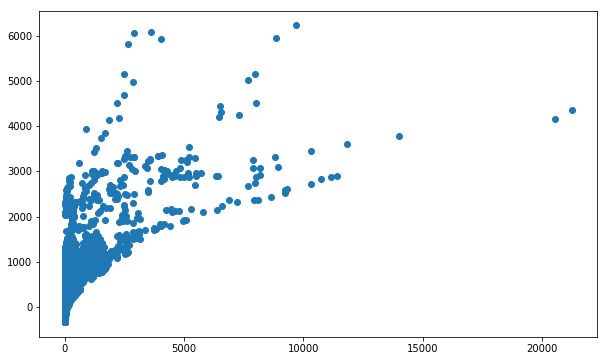

In [48]:
#visualizing the y_test and y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)

In [49]:
#checking the accuracy
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))

263.72882496442475
373857.80412770907
0.4609498458042952


In [50]:
#via the explained variance score, the accuracy is 46.8%,a bad predictions..we used another model

In [51]:
#using the decision tree regression
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor(random_state=0)

In [52]:
#fitting
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [53]:
#predicting
y_pred=regressor.predict(x_test)

In [54]:
pd.DataFrame(y_pred).to_csv('DT.csv')

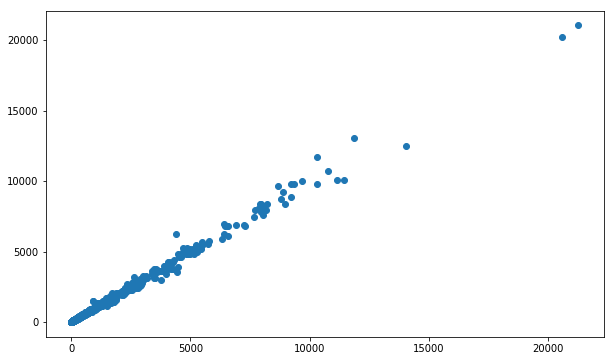

In [55]:
#visualizing the y_test and y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)

In [56]:
#checking the accuracy
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))

10.436496525281571
3279.6806853582552
0.9952697353215806


In [57]:
#the accuracy is 99.5% using desicion tree...can still do more than that

In [58]:
#using random forest regression model
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor(n_estimators=1000,random_state=0)

C:\Users\YUSUF YETUNDE\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
#fitting
regressor.fit(x_train,y_train)

In [ ]:
#predicting
y_pred=regressor.predict(x_test)

In [ ]:
pd.DataFrame(y_pred).to_csv('RF.csv')

In [ ]:
#visualizing the y_test and y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)

In [ ]:
#checking the accuracy
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))

In [ ]:
#the accuracy for random forest model is 99.8%...

In [ ]:
pd.DataFrame(y_test).to_csv('Congress.csv')